# Stable-baselines

Stable-baselines is a fork of the original baselines from OpenAI. It has many state-of-the-art reinforcement learning (RL) algorithms like the original baseline does, and provides further support such as Ipython Notebook and algorithm customization. To install Stable-baselines, please follow the instructions in the link below for `Detailed documentation`. Unix based system (Mac OS or Linux) is recommended since it makes the installation of many packages a lot easier.

- Detailed documentation: https://stable-baselines.readthedocs.io/en/master/index.html
- Github Reop: https://github.com/hill-a/stable-baselines

#### Great Info about baselines
- OpenAI Spinning Up: https://spinningup.openai.com/en/latest/

# Getting Started

The following code is a simple example of training CartPole agent using PPO agent. It covers basic functionalities such as define, evaluate, train, save & load models.

- gym can be installed using `pip install gym` in terminals for the Anaconda environment.
    - Intro to OpenAI Gym: https://gym.openai.com/docs/
    - look up environment ID: https://github.com/openai/gym/blob/master/gym/envs/__init__.py

In [1]:
import os

import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, display

from stable_baselines.common.policies import MlpPolicy
from stable_baselines.common.vec_env import DummyVecEnv, SubprocVecEnv
from stable_baselines.common import set_global_seeds
from stable_baselines import PPO2
from stable_baselines.bench import Monitor
from stable_baselines.results_plotter import load_results, ts2xy

C:\Users\j5weng\AppData\Local\Continuum\anaconda3\envs\opensim-rl\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\j5weng\AppData\Local\Continuum\anaconda3\envs\opensim-rl\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\j5weng\AppData\Local\Continuum\anaconda3\envs\opensim-rl\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16"

#### Define an environment

In [2]:
env = gym.make('CartPole-v1')     # Make the environement by specifying the environment ID
env.max_episode_steps = 500       # Modeify the max episode steps to a customed value (default = 200)

#### Define a evaluate function

In [3]:
# this is a helper function to evalute the mean reward of the last n episodes
def evaluate(model, num_steps=1000, num_episodes=10):
    """
    Evaluate a RL agent
    :param model: (BaseRLModel object) the RL Agent
    :param num_steps: (int) number of timesteps to evaluate it
    :num_episodes: (int) number of last episodes to evaluate the results
    :return: (float) Mean reward for the last 100 episodes
    """
    episode_rewards = [0.0]
    obs = env.reset() # reset the environment states to initial values
    for i in range(num_steps):
        action, _states = model.predict(obs) # _states are only useful when using LSTM policies
        obs, reward, done, info = env.step(action)

        # Stats
        episode_rewards[-1] += reward # accumulate the reward
        if done:
            obs = env.reset()
            episode_rewards.append(0.0) # add a new item into the list for a new episode
    # Compute mean reward for the last 100 episodes
    mean_100ep_reward = round(np.mean(episode_rewards[-num_episodes:]), 1)
    print("Mean reward for the last {} episodes:".format(num_episodes), mean_100ep_reward, "   Num episodes:", len(episode_rewards))

    return mean_100ep_reward

#### Moniter the training process

In [4]:
best_mean_reward, n_steps = -np.inf, 0

def callback(_locals, _globals):
    """
    Callback called at each step (for DQN an others) or after n steps (see ACER or PPO2)
    :param _locals: (dict)
    :param _globals: (dict)
    """
    global n_steps, best_mean_reward
    # Print stats every 1000 calls
    if (n_steps + 1) % 10 == 0:
        # Evaluate policy training performance
        x, y = ts2xy(load_results(log_dir), 'timesteps')
        if len(x) > 0:
            mean_reward = np.mean(y[-10:])
            clear_output(wait=True)
            print(x[-1], 'timesteps')
            print("Best mean reward: {:.2f} - Last mean reward per episode: {:.2f}".format(best_mean_reward, mean_reward))

            # New best model, you could save the agent here
            if mean_reward > best_mean_reward:
                best_mean_reward = mean_reward
                # Example for saving best model
                print("Saving new best model")
                _locals['self'].save(log_dir + 'best_model.pkl')
    n_steps += 1
    return True


# Create log dir
log_dir = "tmp/gym/CartPole/"
os.makedirs(log_dir, exist_ok=True)

# Create and wrap the environment
env = Monitor(env, log_dir, allow_early_resets=True)
env = DummyVecEnv([lambda: env])  # The algorithms require a vectorized environment to run

#### Define the model

In [5]:
model = PPO2(MlpPolicy, env, verbose=0);





Instructions for updating:
Use keras.layers.flatten instead.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




#### Evaluate before training

In [6]:
#########################################commented because it interferes with the loging function in callback
# print('Before training:')
# mean_reward_before_train = evaluate(model, num_steps=10000, num_episodes=20)

#### Train the model

In [ ]:
model.learn(total_timesteps=200000, callback=callback)
model.save(log_dir+'latest_model') 

#### Evaluate after training

In [10]:
#########################################commented because it interferes with the loging function in callback
# print('After training:')
# mean_reward_before_train = evaluate(model, num_steps=10000, num_episodes=20)

#### Plot the results

In [15]:
def moving_average(values, window):
    """
    Smooth values by doing a moving average
    :param values: (numpy array)
    :param window: (int)
    :return: (numpy array)
    """
    weights = np.repeat(1.0, window) / window
    return np.convolve(values, weights, 'valid')


def plot_results(log_folder, title='Learning Curve'):
    """
    plot the results

    :param log_folder: (str) the save location of the results to plot
    :param title: (str) the title of the task to plot
    """
    x, y = ts2xy(load_results(log_folder), 'timesteps')
    y = moving_average(y, window=10)
    # Truncate x
    x = x[len(x) - len(y):]

    fig = plt.figure(title)
    plt.plot(x, y)
    plt.xlabel('Number of Timesteps')
    plt.ylabel('Rewards')
    plt.title(title + " Smoothed")
    plt.show()

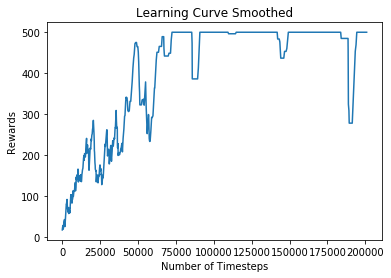

In [16]:
plot_results(log_dir)

#### Render the results

In [17]:
obs = env.reset()
for i in range(2000):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    env.render()

#### [NOTE ONLY] Save & load the model entirely

In [5]:
# saves the agent as a .pkl file
model.save("PPO2_CartPole") 

# delete & load the model (recrete the model entirely)
del model
model = PPO2.load('PPO2_CartPole')

#### [NOTE ONLY] Save & load the model parameters only

In [6]:
# load parameters from a saved model to a defined model
model.load_parameters(log_dir+'best_model.pkl', exact_match=True)

# Multiprocessing

Multiprocessing allows us to run multiple environments at the same time. To multiprocess RL training, we will just have to wrap the Gym env into a SubprocVecEnv object, that will take care of synchronising the processes.

- an additional utility function `make_env` is needed to instantiate the environments
- `make_env` uses different seeds to ensure each env is different
- vectorized environment is required: https://stable-baselines.readthedocs.io/en/master/guide/vec_envs.html

In [2]:
def make_env(env_id, rank, seed=0):
    """
    Utility function for multiprocessed env.
    
    :param env_id: (str) the environment ID
    :param num_env: (int) the number of environment you wish to have in subprocesses 
    :param seed: (int) the inital seed for RNG
    :param rank: (int) index of the subprocess
    """
    def _init():
        env = gym.make(env_id)
        env.seed(seed + rank)
        return env
    set_global_seeds(seed)
    return _init

In [3]:
def evaluate(model, num_steps=1000, visualize=False):
    """
    Evaluate a RL agent
    :param model: (BaseRLModel object) the RL Agent
    :param num_steps: (int) number of timesteps to evaluate it
    :return: (float) Mean reward
    """
    episode_rewards = [[0.0] for _ in range(env.num_envs)]
    obs = env.reset()
    for i in range(num_steps):
        # _states are only useful when using LSTM policies
        actions, _states = model.predict(obs)
        # here, action, rewards and dones are arrays
        # because we are using vectorized env
        obs, rewards, dones, info = env.step(actions)
        if visualize:
            env.render(mode='rgb_array')

        # Stats
        for i in range(env.num_envs):
            episode_rewards[i][-1] += rewards[i]
            if dones[i]:
                episode_rewards[i].append(0.0)

    mean_rewards =  [0.0 for _ in range(env.num_envs)]
    n_episodes = 0
    for i in range(env.num_envs):
        mean_rewards[i] = np.mean(episode_rewards[i])     
        n_episodes += len(episode_rewards[i])   

    # Compute mean reward
    mean_reward = round(np.mean(mean_rewards), 1)
    print("Mean reward:", mean_reward, "Num episodes:", n_episodes)

    return mean_reward

In [4]:
env_id = "CartPole-v1"
num_cpu = 11  # Number of processes to use
# Create the vectorized environment
env = SubprocVecEnv([make_env(env_id, i) for i in range(num_cpu)])

model = PPO2(MlpPolicy, env, verbose=0)

In [5]:
mean_reward_before_train = evaluate(model, num_steps=1000)

Mean reward: 21.0 Num episodes: 526


In [6]:
model.learn(total_timesteps=10000000)

KeyboardInterrupt: 

In [9]:
mean_reward_after_train = evaluate(model, num_steps=1000)

Mean reward: 204.2 Num episodes: 20


Note: the benefit of using `SubprocVecEnv` is not as beneficial for simple environment because the overhead of multiprocessing outweights the environment computational time: https://stable-baselines.readthedocs.io/en/master/guide/vec_envs.html 